# Tutorial 5 
## Gaussian Naive Bayes and Support Vector Machine

### Gaussian Naive Bayes

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('iris.csv')

In [3]:
# looking at the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


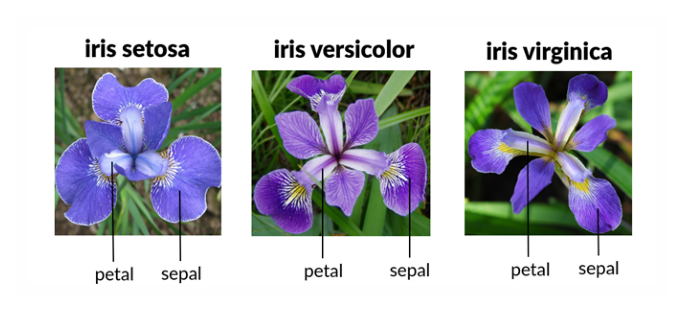

In [4]:
%matplotlib inline

# Load the image for three categories of the flowers
img=mpimg.imread('iris_types.png')
plt.figure(figsize=(12, 24))
plt.axis('off')
plt.imshow(img)

In [8]:
# Spliting the dataset into independent and dependent variables

# Independent variables
X = dataset.iloc[:,:4].values

# Dependent variables
y = dataset['species'].values
# print(X, y)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Split the dataset (X, y) into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

# Display rows and columns
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [14]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler

# Create an initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform
X_train = sc.fit_transform(X_train)

# Store the transformed data into X_test
X_test = sc.transform(X_test)

# print(X_train, X_test)

In [17]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Call fit() method for training the dataset
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [18]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [20]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:30,:]

array([['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['versicolor', 'virginica'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['virginica', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['versicolor', 'versicolor'],
       ['setosa', 'setosa'],
       ['versicolor', 'versicolor'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['versicolor', 'versicolor'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['versicolor', 'versicolor']

A confusion matrix is a table that is used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]] (3, 3)


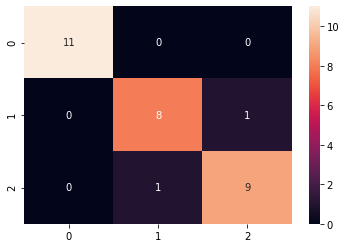

In [23]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print(cm, cm.shape)

In [24]:
# Find an accuracy from the confusion matrix.
rowsCols = cm.shape
corrPred = 0
falsePred = 0

for row in range(rowsCols[0]):
    for col in range(rowsCols[1]):
        if row == col:
            corrPred += cm[row, col]
        else:
            falsePred += cm[row, col]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))            

Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


## Use of Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Calculate the score using cross validation method
cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 20).mean()

0.9598214285714286

## Task 1
"This dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars." (UC Irvine) Dataset comprises of 13 features (alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline) and type of wine cultivar. This data has three type of wine Class_0, Class_1, and Class_3. Here you can build a model to classify the type of wine.
### Use GNB model to classify the three types of wine.

In [26]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [27]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


# Case Study: Breast Cancer Classification Using a Support Vector Machine

## Step 1: Exploring the Dataset
### First, let’s understand our dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


<AxesSubplot:xlabel='mean_texture', ylabel='mean_perimeter'>

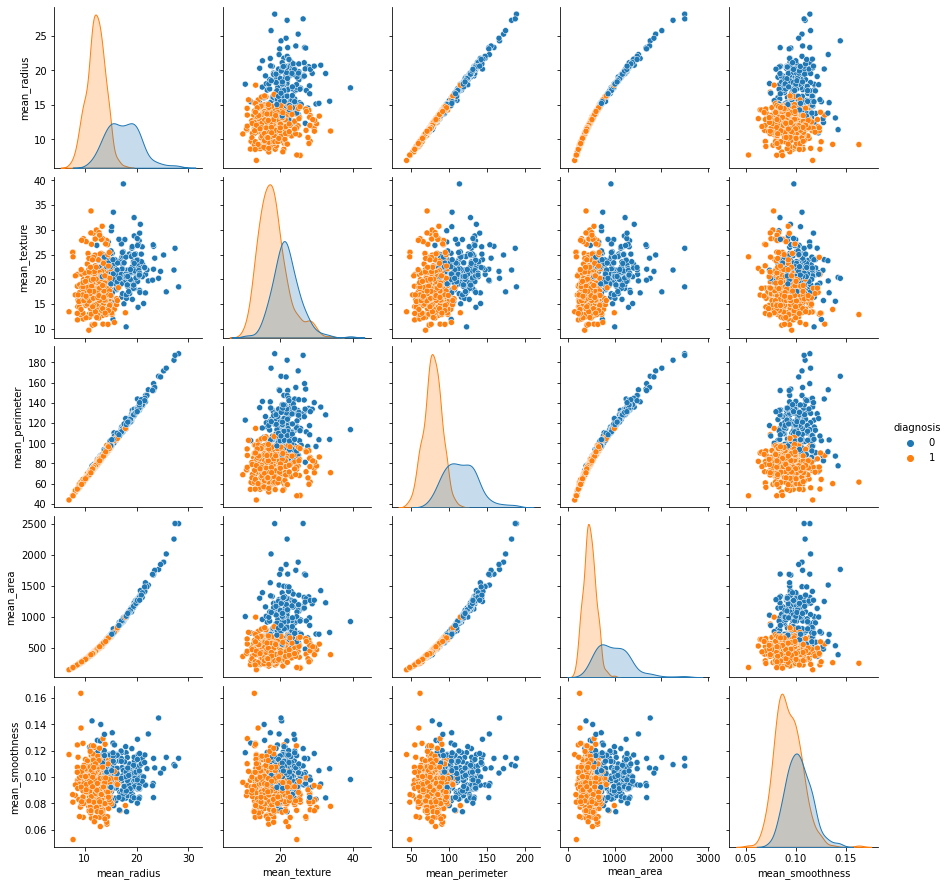

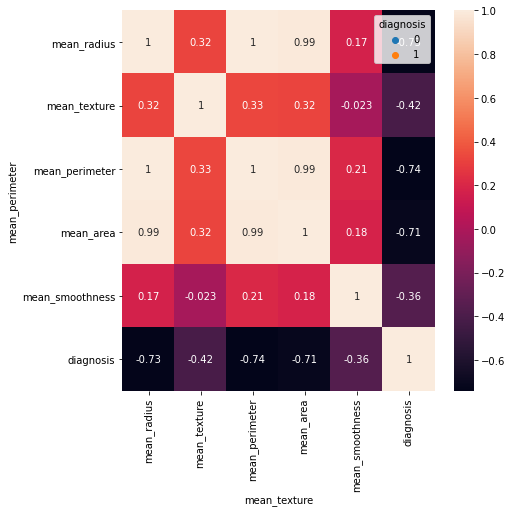

In [30]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

#import Data
df_cancer = pd.read_csv('Breast_cancer_data.csv')
df_cancer.head()

#get some information about our Data-Set
df_cancer.info()
df_cancer.describe()

#visualizing data
sns.pairplot(df_cancer, hue = 'diagnosis')
plt.figure(figsize=(7,7))
sns.heatmap(df_cancer['mean_radius mean_texture mean_perimeter mean_area mean_smoothness diagnosis'.split()].corr(), annot=True)
sns.scatterplot(x = 'mean_texture', y = 'mean_perimeter', hue = 'diagnosis', data = df_cancer)

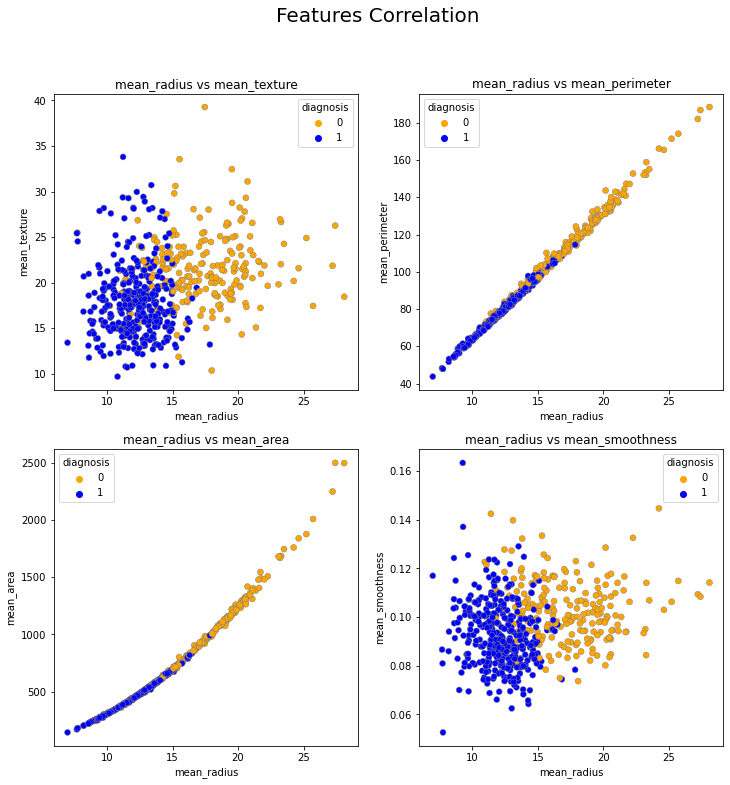

In [31]:
# Visualizing features correlation
palette ={0 : 'orange', 1 : 'blue'}
edgecolor = 'grey'
fig = plt.figure(figsize = (12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_texture'], hue = "diagnosis",
data = df_cancer, palette = palette, edgecolor = edgecolor)
plt.title('mean_radius vs mean_texture')

plt.subplot(222)
ax2 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_perimeter'], hue = "diagnosis",
data = df_cancer, palette = palette, edgecolor = edgecolor)
plt.title('mean_radius vs mean_perimeter')

plt.subplot(223)
ax3 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_area'], hue = "diagnosis",
data = df_cancer, palette = palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_area')

plt.subplot(224)
ax4 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_smoothness'], hue = "diagnosis",
data = df_cancer, palette = palette, edgecolor = edgecolor)
plt.title('mean_radius vs mean_smoothness')
fig.suptitle('Features Correlation', fontsize = 20)
plt.savefig('2')
plt.show()

# Step 2: Handling of Missing/ Categorical Data
Before applying any method, we need to check if any values are missing and then deal with them if so. In this dataset, there are no missing values — but always keep the habit of checking for null values in a dataset!
Since machine learning models are based on mathematical equations, we need to encode the categorical variables. Here I used label encoding since we have two distinct values in the “diagnosis” column:

In [32]:
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [33]:
#check how many values are missing (NaN)
# here we do not have any missing values
df_cancer.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [20]:
#handling categorical data
df_cancer['diagnosis'].unique()
df_cancer['diagnosis'].map({0:'benign', 1:'malignant'})

0         benign
1         benign
2         benign
3         benign
4         benign
         ...    
564       benign
565       benign
566       benign
567       benign
568    malignant
Name: diagnosis, Length: 569, dtype: object

Text(0.5, 1.0, 'number of Benign_0 vs Malignan_1')

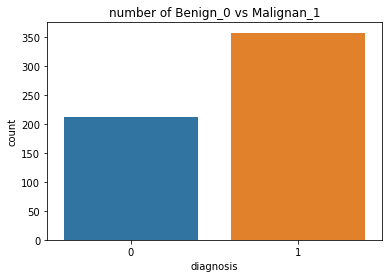

In [34]:
# visualizing diagnosis column >>> 'benign':0,'malignant':1
sns.countplot(x='diagnosis',data = df_cancer)
plt.title('number of Benign_0 vs Malignan_1')

Text(0.5, 1.0, 'Corr. between features and target')

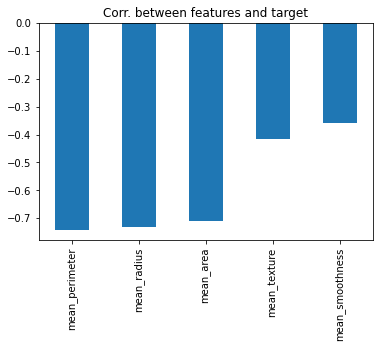

In [35]:
# correlation between features
df_cancer.corr()['diagnosis'][:-1].sort_values().plot(kind ='bar')
plt.title('Corr. between features and target')

## Step 3: Splitting the Data-Set into Training Set and Test Set
Data is divided into the Train set and Test set. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set.
Features (X): The columns that are inserted into our model will be used to make predictions.
Prediction (y): Target variable that will be predicted by the features.

In [38]:
# define X variables and our target(y)
X = df_cancer.drop(['diagnosis'],axis=1).values
y = df_cancer['diagnosis'].values

# print(X, y)

In [40]:
# split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

X.shape, y.shape, X_train.shape, y_test.shape

((569, 5), (569,), (426, 5), (143,))

## Step 4: Data Modeling-Support Vector Machine
Support Vector Machine (SVM) is one of the most useful supervised ML algorithms. It can be used for both classification and regression tasks.
There are a couple of concepts we first need to understand:
### What is the SVM Job? 
SVM chooses the hyperplane that does maximum separation between classes.
### What are hard and soft margins? 
If data can be linearly separable, SVM might return maximum accuracy (Hard Margin). When data is not linearly separable, all we need do is relax the margin to allow misclassifications (Soft Margin).
### What is Hyper-parameter C? 
The number of misclassifications errors can be controlled using the C parameter, which has a direct effect on the hyperplane.
### What is Hyper-parameter gamma? 
Gamma is used to give weightage to points close to support vector. In other words, changing the value of gamma would change the shape of the hyperplane.
### What is Kernel Trick? 
if our data is not linearly separable, we could apply a “Kernel Trick” method which maps the nonlinear data to higher dimensional space.

In [43]:
#Support Vector Classification model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

## Step 5: Model Evaluation

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        55
           1       0.86      0.98      0.91        88

    accuracy                           0.89       143
   macro avg       0.91      0.86      0.88       143
weighted avg       0.90      0.89      0.88       143



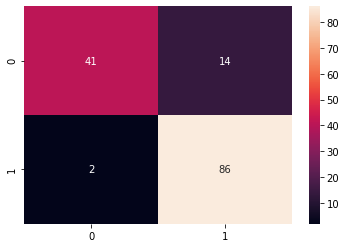

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

### What does the confusion_matrix information result mean?:
We had 143 women in our test set.
Out of 55 women predicted to not have breast cancer, two were classified as not having when actually they had (type one error).
Out of 88 women predicted to have breast cancer, 14 were classified as having breast cancer whey they did not (type two error).

## Step 6: What Can We Do to Improve Our Model?
1. Data normalization
Feature scaling will help us to see all the variables from the same lens (same scale), in this way we will bring all values into the range [0,1]:

              precision    recall  f1-score   support

           0       0.92      0.87      0.90        55
           1       0.92      0.95      0.94        88

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



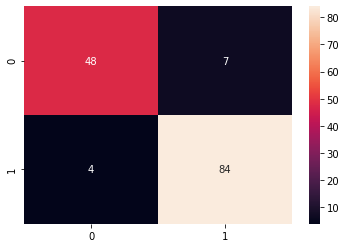

In [26]:
#normalized scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))

#Support Vector Classification model -  apply on scaled data
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

## What does this classification report result mean? Basically, it means that the SVM model was able to classify tumors into malignant/benign with 92% accuracy.
2. SVM parameters optimization

C parameter — as we said, it controls the cost of misclassification on Train data.
1. Smaller C: Lower variance but higher bias (soft margin) and reduce the cost of miss-classification (less penalty).
2. Larger C: Lower bias and higher variance (hard margin) and increase the cost of miss-classification (more strict).
### Gamma:
1. Smaller Gamma: Large variance, far reach, and more generalized solution.
2. Larger Gamma: High variance and low bias, close reach, and also closer data points have a higher weight.
So, let’s find the optimal parameters for our model using grid search:

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
              precision    r

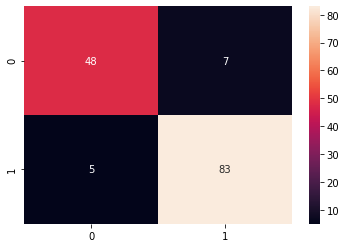

In [27]:
# find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

It is clear from the confusion matrix that last model improvement in the model did not yield the percentage of accuracy. However, we were succeed to decrease an error type II.

## Reference: 
1. <p>https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn</p>
2. <p>https://towardsdatascience.com/case-study-breast-cancer-classification-svm-2b67d668bbb7</p>